# 買菜的角色 如何分析食物較便宜的圖表/時間序列的格式
# EDA:假設
# pd.to_datetime() 時間處理成pd可以呈現
# matplot 

In [1]:
#dtype = str,最好读取的时候都以字符串的形式读入，不然可能会使数据失真
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.read_csv('https://datacenter.taichung.gov.tw/swagger/OpenData/7196c54b-966b-48c8-8c3e-5124ac8070d1') 

,訪價日期,市場名稱,絲瓜,花胡瓜,結球白菜,蘿蔔,胡蘿蔔,青蔥,胡瓜,青江白菜,空心菜,甘藍,香蕉,番石榴_珍珠,鳳梨_開英,荔枝_黑葉,火龍果_紅肉,芒果_愛文,木瓜,文旦,新世紀梨,檸檬,鳳梨_四號,火龍果_白肉,新興梨,橫山梨,牛心柿,甜柿,紅柿_軟柿,桶柑,椪柑,海梨柑,鳯梨_金鑽,柳橙,蓮霧,棗子,茂谷柑,芒果,大西瓜,小番茄_玉女,小番茄_聖女,花椰菜,洋蔥,大蒜,吳郭魚,虱目魚,金目鱸,龍虎班,午仔魚,白蝦,文蛤,里肌肉,後腿肉,五花肉,牛腱_冷凍牛肉,腿肉_冷凍牛肉,腩肉_冷凍牛肉,雞蛋,鴨蛋,肉雞,土雞,仿雞,鴨_土番鴨
0,21/03/2020,沙鹿市場,25.0,20,25,20,18,50.0,30,25,25,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,30.0,120,50,100,200,260,200,350,120,160,130,160,220,220,240,30,32,130,140,130,130
1,22/03/2020,第五市場,50.0,0,40,50,30,50.0,40,75,0,0,30,60,0,0,0,0,80,0,0,70,0,0,60,0,0,60,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22/03/2020,大甲第二市場,35.0,38,25,28,28,30.0,30,20,0,20,0,0,0,0,0,0,55,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22/03/2020,南屯市場,45.0,35,15,18,22,45.0,30,15,38,15,40,50,40,0,0,60,100,0,0,60,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22/03/2020,東光市場,40.0,55,28,25,25,50.0,35,35,30,20,35,39,0,0,75,120,39,0,0,50,32,85,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,21/01/2021,建國市場,45.0,45,25,20,20,30.0,25,30,0,35,18,35,22,0,45,0,30,0,0,30,20,45,0,0,0,0,0,35,45,30,22,20,90,80,55,0,25,100,50,60,20.0,80,64,80,80,200,160,220,120,120,85,120,170,200,220,33,50,80,92,88,80
3164,21/01/2021,豐原第一市場,45.0,60,45,30,35,50.0,45,50,50,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,30.0,160,68,80,100,240,200,200,80,140,110,140,180,200,190,35,56,70,120,110,100
3165,22/01/2021,東光市場,65.0,65,40,25,35,45.0,45,50,50,45,19,39,0,0,55,0,45,0,0,35,0,65,0,0,0,0,0,39,55,45,25,25,85,85,39,0,0,150,0,45,30.0,140,80,90,145,0,300,300,120,140,120,140,260,0,260,38,60,110,135,120,110
3166,22/01/2021,中義市場,60.0,69,40,25,30,60.0,50,45,45,35,20,25,0,0,39,0,35,0,0,49,25,39,0,0,0,70,0,45,55,34,30,17,49,59,40,0,0,120,55,30,35.0,130,4,8,6,10,12,16,8,120,100,130,220,200,220,38,60,120,140,120,110


In [2]:
df_train = pd.read_csv('https://datacenter.taichung.gov.tw/swagger/OpenData/7196c54b-966b-48c8-8c3e-5124ac8070d1')

### missingno.matrix 了解資料是否有缺失
### 全黑代表資料沒有掉

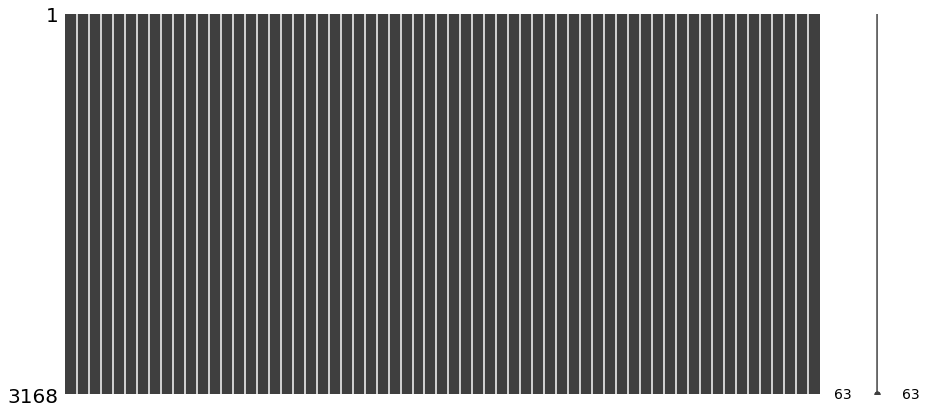

In [4]:
import missingno
missingno.matrix(df_train, figsize = (15,7)) 

### 查看數據類型

### 部分蔬果資料型態為object　需進行清洗

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   訪價日期     3168 non-null   object 
 1   市場名稱     3168 non-null   object 
 2   絲瓜       3168 non-null   float64
 3   花胡瓜      3168 non-null   int64  
 4   結球白菜     3168 non-null   int64  
 5   蘿蔔       3168 non-null   int64  
 6   胡蘿蔔      3168 non-null   int64  
 7   青蔥       3168 non-null   float64
 8   胡瓜       3168 non-null   int64  
 9   青江白菜     3168 non-null   int64  
 10  空心菜      3168 non-null   int64  
 11  甘藍       3168 non-null   int64  
 12  香蕉       3168 non-null   int64  
 13  番石榴_珍珠   3168 non-null   int64  
 14  鳳梨_開英    3168 non-null   object 
 15  荔枝_黑葉    3168 non-null   int64  
 16  火龍果_紅肉   3168 non-null   int64  
 17  芒果_愛文    3168 non-null   int64  
 18  木瓜       3168 non-null   int64  
 19  文旦       3168 non-null   object 
 20  新世紀梨     3168 non-null   int64  
 21  檸檬       3168 

### 資料清洗
####  調整數據類型轉換 將字串轉變為數值

In [6]:
df_train['鳳梨_開英'] =df_train['鳳梨_開英'].str.strip('-')
df_train['鳳梨_開英'] = df_train['鳳梨_開英'].astype('float')
df_train['文旦'] =df_train['文旦'].str.strip('+') 
df_train['文旦'] = df_train['文旦'].astype('int')

In [7]:
# 將 文旦 鳳梨_開英 轉換成 int float
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   訪價日期     3168 non-null   object 
 1   市場名稱     3168 non-null   object 
 2   絲瓜       3168 non-null   float64
 3   花胡瓜      3168 non-null   int64  
 4   結球白菜     3168 non-null   int64  
 5   蘿蔔       3168 non-null   int64  
 6   胡蘿蔔      3168 non-null   int64  
 7   青蔥       3168 non-null   float64
 8   胡瓜       3168 non-null   int64  
 9   青江白菜     3168 non-null   int64  
 10  空心菜      3168 non-null   int64  
 11  甘藍       3168 non-null   int64  
 12  香蕉       3168 non-null   int64  
 13  番石榴_珍珠   3168 non-null   int64  
 14  鳳梨_開英    3168 non-null   float64
 15  荔枝_黑葉    3168 non-null   int64  
 16  火龍果_紅肉   3168 non-null   int64  
 17  芒果_愛文    3168 non-null   int64  
 18  木瓜       3168 non-null   int64  
 19  文旦       3168 non-null   int64  
 20  新世紀梨     3168 non-null   int64  
 21  檸檬       3168 

# pd.to_datetime()
## 調整數據類型轉換:字串轉換為日期格式
## errors='coerce' 如果原始數據不符合日期的格式，轉值後的值為空值NaT
## 使用loc[] 不用用len將字串轉變成數值 

In [8]:
df_train.loc[:, '訪價日期'] = pd.to_datetime(df_train.loc[:,'訪價日期'],format='%d/%m/%Y', errors='coerce')
df_train.dtypes

訪價日期     datetime64[ns]
市場名稱             object
絲瓜              float64
花胡瓜               int64
結球白菜              int64
              ...      
鴨蛋                int64
肉雞                int64
土雞                int64
仿雞                int64
鴨_土番鴨             int64
Length: 63, dtype: object

### 成功將字串轉換為日期

In [9]:
df_train

,訪價日期,市場名稱,絲瓜,花胡瓜,結球白菜,蘿蔔,胡蘿蔔,青蔥,胡瓜,青江白菜,空心菜,甘藍,香蕉,番石榴_珍珠,鳳梨_開英,荔枝_黑葉,火龍果_紅肉,芒果_愛文,木瓜,文旦,新世紀梨,檸檬,鳳梨_四號,火龍果_白肉,新興梨,橫山梨,牛心柿,甜柿,紅柿_軟柿,桶柑,椪柑,海梨柑,鳯梨_金鑽,柳橙,蓮霧,棗子,茂谷柑,芒果,大西瓜,小番茄_玉女,小番茄_聖女,花椰菜,洋蔥,大蒜,吳郭魚,虱目魚,金目鱸,龍虎班,午仔魚,白蝦,文蛤,里肌肉,後腿肉,五花肉,牛腱_冷凍牛肉,腿肉_冷凍牛肉,腩肉_冷凍牛肉,雞蛋,鴨蛋,肉雞,土雞,仿雞,鴨_土番鴨
0,2020-03-21,沙鹿市場,25.0,20,25,20,18,50.0,30,25,25,30,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,30.0,120,50,100,200,260,200,350,120,160,130,160,220,220,240,30,32,130,140,130,130
1,2020-03-22,第五市場,50.0,0,40,50,30,50.0,40,75,0,0,30,60,0.0,0,0,0,80,0,0,70,0,0,60,0,0,60,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-22,大甲第二市場,35.0,38,25,28,28,30.0,30,20,0,20,0,0,0.0,0,0,0,55,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-22,南屯市場,45.0,35,15,18,22,45.0,30,15,38,15,40,50,40.0,0,0,60,100,0,0,60,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-22,東光市場,40.0,55,28,25,25,50.0,35,35,30,20,35,39,0.0,0,75,120,39,0,0,50,32,85,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,2021-01-21,建國市場,45.0,45,25,20,20,30.0,25,30,0,35,18,35,22.0,0,45,0,30,0,0,30,20,45,0,0,0,0,0,35,45,30,22,20,90,80,55,0,25,100,50,60,20.0,80,64,80,80,200,160,220,120,120,85,120,170,200,220,33,50,80,92,88,80
3164,2021-01-21,豐原第一市場,45.0,60,45,30,35,50.0,45,50,50,45,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,30.0,160,68,80,100,240,200,200,80,140,110,140,180,200,190,35,56,70,120,110,100
3165,2021-01-22,東光市場,65.0,65,40,25,35,45.0,45,50,50,45,19,39,0.0,0,55,0,45,0,0,35,0,65,0,0,0,0,0,39,55,45,25,25,85,85,39,0,0,150,0,45,30.0,140,80,90,145,0,300,300,120,140,120,140,260,0,260,38,60,110,135,120,110
3166,2021-01-22,中義市場,60.0,69,40,25,30,60.0,50,45,45,35,20,25,0.0,0,39,0,35,0,0,49,25,39,0,0,0,70,0,45,55,34,30,17,49,59,40,0,0,120,55,30,35.0,130,4,8,6,10,12,16,8,120,100,130,220,200,220,38,60,120,140,120,110


### 訪價日期的字串轉為日期
### 將 文旦 鳳梨_開英 轉換成 int float

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   訪價日期     3168 non-null   datetime64[ns]
 1   市場名稱     3168 non-null   object        
 2   絲瓜       3168 non-null   float64       
 3   花胡瓜      3168 non-null   int64         
 4   結球白菜     3168 non-null   int64         
 5   蘿蔔       3168 non-null   int64         
 6   胡蘿蔔      3168 non-null   int64         
 7   青蔥       3168 non-null   float64       
 8   胡瓜       3168 non-null   int64         
 9   青江白菜     3168 non-null   int64         
 10  空心菜      3168 non-null   int64         
 11  甘藍       3168 non-null   int64         
 12  香蕉       3168 non-null   int64         
 13  番石榴_珍珠   3168 non-null   int64         
 14  鳳梨_開英    3168 non-null   float64       
 15  荔枝_黑葉    3168 non-null   int64         
 16  火龍果_紅肉   3168 non-null   int64         
 17  芒果_愛文    3168 non-null   int64   

### 抽取前5數據，直觀地看意義，並找出問題

### 問題:
### 並非所有市場都有所有蔬果的價格

In [5]:
df_train.head()

,訪價日期,市場名稱,絲瓜,花胡瓜,結球白菜,蘿蔔,胡蘿蔔,青蔥,胡瓜,青江白菜,空心菜,甘藍,香蕉,番石榴_珍珠,鳳梨_開英,荔枝_黑葉,火龍果_紅肉,芒果_愛文,木瓜,文旦,新世紀梨,檸檬,鳳梨_四號,火龍果_白肉,新興梨,橫山梨,牛心柿,甜柿,紅柿_軟柿,桶柑,椪柑,海梨柑,鳯梨_金鑽,柳橙,蓮霧,棗子,茂谷柑,芒果,大西瓜,小番茄_玉女,小番茄_聖女,花椰菜,洋蔥,大蒜,吳郭魚,虱目魚,金目鱸,龍虎班,午仔魚,白蝦,文蛤,里肌肉,後腿肉,五花肉,牛腱_冷凍牛肉,腿肉_冷凍牛肉,腩肉_冷凍牛肉,雞蛋,鴨蛋,肉雞,土雞,仿雞,鴨_土番鴨
0,21/03/2020,沙鹿市場,25.0,20,25,20,18,50.0,30,25,25,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,30.0,120,50,100,200,260,200,350,120,160,130,160,220,220,240,30,32,130,140,130,130
1,22/03/2020,第五市場,50.0,0,40,50,30,50.0,40,75,0,0,30,60,0,0,0,0,80,0,0,70,0,0,60,0,0,60,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22/03/2020,大甲第二市場,35.0,38,25,28,28,30.0,30,20,0,20,0,0,0,0,0,0,55,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22/03/2020,南屯市場,45.0,35,15,18,22,45.0,30,15,38,15,40,50,40,0,0,60,100,0,0,60,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22/03/2020,東光市場,40.0,55,28,25,25,50.0,35,35,30,20,35,39,0,0,75,120,39,0,0,50,32,85,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 將數據中的0取代為None  因為0會影響平均數,眾數等等...

In [11]:
df_train.iloc[:, [i for i in range(0, len(df_train.columns))]].replace(0,np.NaN)
df_train = df_train.iloc[:, [i for i in range(0, len(df_train.columns))]].replace(0,np.NaN)
df_train.head(5)

#df_train = df_train.replace(0, np.NaN)
#df_train.head

,訪價日期,市場名稱,絲瓜,花胡瓜,結球白菜,蘿蔔,胡蘿蔔,青蔥,胡瓜,青江白菜,空心菜,甘藍,香蕉,番石榴_珍珠,鳳梨_開英,荔枝_黑葉,火龍果_紅肉,芒果_愛文,木瓜,文旦,新世紀梨,檸檬,鳳梨_四號,火龍果_白肉,新興梨,橫山梨,牛心柿,甜柿,紅柿_軟柿,桶柑,椪柑,海梨柑,鳯梨_金鑽,柳橙,蓮霧,棗子,茂谷柑,芒果,大西瓜,小番茄_玉女,小番茄_聖女,花椰菜,洋蔥,大蒜,吳郭魚,虱目魚,金目鱸,龍虎班,午仔魚,白蝦,文蛤,里肌肉,後腿肉,五花肉,牛腱_冷凍牛肉,腿肉_冷凍牛肉,腩肉_冷凍牛肉,雞蛋,鴨蛋,肉雞,土雞,仿雞,鴨_土番鴨
0,2020-03-21,沙鹿市場,25.0,20.0,25.0,20.0,18,50.0,30,25,25.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,120.0,50.0,100.0,200.0,260.0,200.0,350.0,120.0,160.0,130.0,160.0,220.0,220.0,240.0,30.0,32.0,130.0,140.0,130.0,130.0
1,2020-03-22,第五市場,50.0,NaN,40.0,50.0,30,50.0,40,75,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,70.0,NaN,NaN,60.0,NaN,NaN,60.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-22,大甲第二市場,35.0,38.0,25.0,28.0,28,30.0,30,20,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-22,南屯市場,45.0,35.0,15.0,18.0,22,45.0,30,15,38.0,15.0,40.0,50.0,40.0,NaN,NaN,60.0,100.0,NaN,NaN,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-22,東光市場,40.0,55.0,28.0,25.0,25,50.0,35,35,30.0,20.0,35.0,39.0,NaN,NaN,75.0,120.0,39.0,NaN,NaN,50.0,32.0,85.0,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 改欄位名字

In [12]:
df_train=df_train.rename(columns={"市場名稱": "market"})
df_train.head(5)

,訪價日期,market,絲瓜,花胡瓜,結球白菜,蘿蔔,胡蘿蔔,青蔥,胡瓜,青江白菜,空心菜,甘藍,香蕉,番石榴_珍珠,鳳梨_開英,荔枝_黑葉,火龍果_紅肉,芒果_愛文,木瓜,文旦,新世紀梨,檸檬,鳳梨_四號,火龍果_白肉,新興梨,橫山梨,牛心柿,甜柿,紅柿_軟柿,桶柑,椪柑,海梨柑,鳯梨_金鑽,柳橙,蓮霧,棗子,茂谷柑,芒果,大西瓜,小番茄_玉女,小番茄_聖女,花椰菜,洋蔥,大蒜,吳郭魚,虱目魚,金目鱸,龍虎班,午仔魚,白蝦,文蛤,里肌肉,後腿肉,五花肉,牛腱_冷凍牛肉,腿肉_冷凍牛肉,腩肉_冷凍牛肉,雞蛋,鴨蛋,肉雞,土雞,仿雞,鴨_土番鴨
0,2020-03-21,沙鹿市場,25.0,20.0,25.0,20.0,18,50.0,30,25,25.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,120.0,50.0,100.0,200.0,260.0,200.0,350.0,120.0,160.0,130.0,160.0,220.0,220.0,240.0,30.0,32.0,130.0,140.0,130.0,130.0
1,2020-03-22,第五市場,50.0,NaN,40.0,50.0,30,50.0,40,75,NaN,NaN,30.0,60.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,70.0,NaN,NaN,60.0,NaN,NaN,60.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-22,大甲第二市場,35.0,38.0,25.0,28.0,28,30.0,30,20,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-22,南屯市場,45.0,35.0,15.0,18.0,22,45.0,30,15,38.0,15.0,40.0,50.0,40.0,NaN,NaN,60.0,100.0,NaN,NaN,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-22,東光市場,40.0,55.0,28.0,25.0,25,50.0,35,35,30.0,20.0,35.0,39.0,NaN,NaN,75.0,120.0,39.0,NaN,NaN,50.0,32.0,85.0,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 假設
1. 白蝦在哪個月最便宜→得知這段時間或許是白蝦產季
2. 此季節的白蝦哪個市場平均價格低於大部分市場→可以再哪個市場買到月最便宜的白蝦
3. time_series_plot 時間分布圖 折線圖 1~12月的折線圖

In [13]:
_shrimp = df_train[['market', '訪價日期', '白蝦']]
_shrimp

,market,訪價日期,白蝦
0,沙鹿市場,2020-03-21,350.0
1,第五市場,2020-03-22,NaN
2,大甲第二市場,2020-03-22,NaN
3,南屯市場,2020-03-22,NaN
4,東光市場,2020-03-22,NaN
...,...,...,...
3163,建國市場,2021-01-21,220.0
3164,豐原第一市場,2021-01-21,200.0
3165,東光市場,2021-01-22,300.0
3166,中義市場,2021-01-22,16.0


In [14]:
_shrimp_mean = _shrimp[_shrimp.白蝦 > 0].mean() #平均白蝦價格
_target =  _shrimp[_shrimp.白蝦 < int(_shrimp_mean)] #找出小於平均白蝦價格
_target

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,market,訪價日期,白蝦
26,清水第一市場,2020-03-24,200.0
27,豐原第一市場,2020-03-24,200.0
39,清水第一市場,2020-03-25,200.0
40,豐原第一市場,2020-03-25,200.0
52,豐原第一市場,2020-03-26,200.0
...,...,...,...
3154,合作市場,2021-01-20,200.0
3158,中義市場,2021-01-21,16.0
3163,建國市場,2021-01-21,220.0
3164,豐原第一市場,2021-01-21,200.0


In [15]:
month_ = _shrimp['訪價日期'].dt.month #指定月份
_Oct = _target[month_ == 10] #印出Oct. shrimp低於平均價格的市場訪價
_Oct

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,market,訪價日期,白蝦
1985,中義市場,2020-10-01,15.0
1986,建國市場,2020-10-01,220.0
1988,清水第一市場,2020-10-01,200.0
1990,豐原第一市場,2020-10-01,192.0
1993,合作市場,2020-10-01,200.0
...,...,...,...
2292,中義市場,2020-10-31,10.0
2294,清水第一市場,2020-10-31,200.0
2295,豐原第一市場,2020-10-31,192.0
2296,建國市場,2020-10-31,220.0


In [16]:
_Oct.median() #得知10月份 白蝦中位數價格

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


白蝦    200.0
dtype: float64

In [20]:
_Oct['十月_白蝦']= pd.cut(_Oct.白蝦,  
              bins=3,
              labels=['low_', 'mid', 'high'])

_Oct.groupby(['market', '訪價日期']).十月_白蝦.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count unique   top freq
market 訪價日期                              
中義市場   2020-10-01     1      1  low_    1
       2020-10-02     1      1  low_    1
       2020-10-03     1      1  low_    1
       2020-10-04     1      1  low_    1
       2020-10-05     1      1  low_    1
...                 ...    ...   ...  ...
豐原第一市場 2020-10-27     1      1  high    1
       2020-10-28     1      1  high    1
       2020-10-29     1      1  high    1
       2020-10-30     1      1  high    1
       2020-10-31     1      1  high    1

[152 rows x 4 columns]

In [22]:
import numpy as np
pd.pivot_table(_Oct, 
        index=['market'],
        columns=['十月_白蝦'],
        values = '白蝦',
        aggfunc=[np.mean] #平均值
              )


mean              
十月_白蝦        low_    mid   high
market                         
中義市場    12.354839    NaN    NaN
合作市場          NaN  120.0  200.0
建國市場          NaN    NaN  220.0
清水第一市場        NaN    NaN  200.0
豐原第一市場        NaN    NaN  192.0

### 畫圖 得知白蝦價格的分布
白蝦的價位差異性極大

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34662 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 34662 missing from current font.
  font.set_text(s, 0, flags=flags)


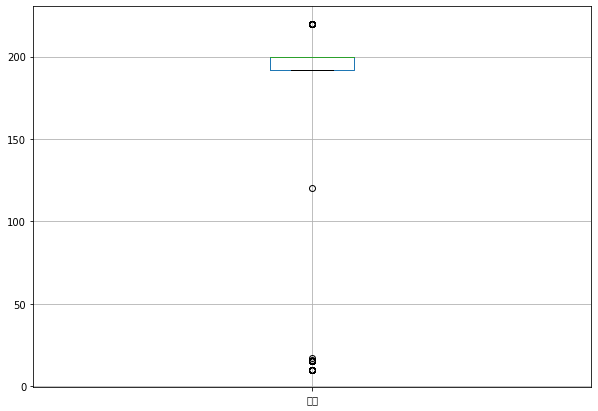

In [37]:
_Oct.boxplot(column=['白蝦'], figsize = (10,7)) 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_

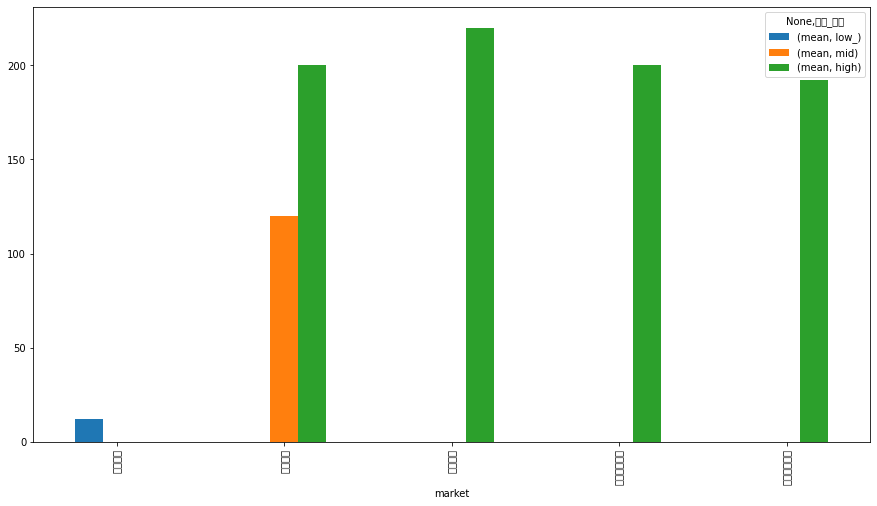

In [38]:
_Octprice.plot(kind='bar', figsize=(15,8))
